In [1]:
%cd "../.."

/home/ensai/projet-statistique-2022


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score
import hdbscan as HD
from sklearn.manifold import TSNE


import seaborn as sns

from word_embedding.distance_wmd import *
from reduction_dim.correlation_matrix import *
import clustering.fit_clustering as CL 


# skipgram

In [3]:
#Read WMD matrix
mat_skipgram_wmd = np.array(lecture_fichier_distances_wmd("distances_skipgram.7z"))
#Read MDS embedding
mat_skipgram_mds = np.array(pd.read_csv("data/tuning/MDS/skipgram_mds_embedding.csv",sep=";",header=0))

print(f"mat_skipgram_wmd shape {mat_skipgram_wmd.shape}")
print(f"mat_skipgram_mds shape {mat_skipgram_mds.shape}")

mat_skipgram_wmd shape (9501, 9501)
mat_skipgram_mds shape (9501, 50)


In [4]:
mat_skipgram_mds_eculidean = euclidean_distances(mat_skipgram_mds)
np.fill_diagonal(mat_skipgram_mds_eculidean,0)

In [68]:

print("Correlation Pearson MDS Euclidien et WMD: ",correlation_epsilon(mat_skipgram_wmd,mat_skipgram_mds_eculidean,epsilon=np.inf))
print("Correlation Spearman MDS Euclidien et WMD: ",correlation_epsilon(mat_skipgram_wmd,mat_skipgram_mds_eculidean,epsilon=np.inf,type="spearman"))
flat_skipgram_wmd,flat_mds_eculidean  = flat_matrix(mat_skipgram_wmd),flat_matrix(mat_skipgram_mds_eculidean)

sample_size = 10**6
sample_index = random.sample(range(len(flat_skipgram_wmd)),sample_size)

plt.figure(figsize = (20,7))
sns.scatterplot(x=flat_skipgram_wmd[sample_index],y=flat_mds_eculidean[sample_index], ax=plt.subplot(1,2,1,title="Paire de distance de wmd en fonctions de celle de mds euclidean"))
plt.xlabel("wmd")
plt.ylabel("mds euclidean")
sns.kdeplot(flat_mds_eculidean[sample_index], ax=plt.subplot(1,2,2,title="Distribution des distance de wmd et mds euclidean"))
sns.kdeplot(flat_skipgram_wmd[sample_index], ax=plt.subplot(1,2,2,title="Distribution des distance de wmd et mds euclidean"))
plt.show()

Correlation Pearson MDS Euclidien et WMD:  0.9938619812233896


In [ ]:
df_summary = pd.concat([pd.DataFrame(flat_skipgram_wmd).describe(),pd.DataFrame(flat_mds_eculidean).describe()],axis=1)
df_summary.columns = ["WMD","MDS Euclidean Distance"]
df_summary

,WMD,MDS Euclidean Distance
count,4.513925e+07,4.513925e+07
mean,3.044101e+02,3.040861e+02
std,1.149981e+02,1.151466e+02
min,0.000000e+00,0.000000e+00
25%,2.250000e+02,2.251967e+02
50%,2.790000e+02,2.791591e+02
75%,3.540000e+02,3.535914e+02
max,1.404000e+03,1.493545e+03


### Comparaison Kmedoid

In [21]:
df_kmedoides_skipgram_wmd,_ = CL.selection_meilleur_kmedoides(distance=mat_skipgram_wmd,init_dim=mat_skipgram_mds.shape[1],ensembleK=range(2,10))
df_kmedoides_skipgram_mds_euclidean,_ = CL.selection_meilleur_kmedoides(distance=mat_skipgram_mds_eculidean,init_dim=mat_skipgram_mds.shape[1],ensembleK=range(2,10))

Recherche optimale - K-médoïdes
0% 4% 7% 13% 16% 22% 29% 32% 38% 41% 47% 54% 57% 63% 66% 72% 79% 82% 88% 91% 97% 
 
Recherche optimale - K-médoïdes
0% 4% 7% 13% 16% 22% 29% 32% 38% 41% 47% 54% 57% 63% 66% 72% DBCV zero-size array to reduction operation minimum which has no identity
79% 82% 88% DBCV zero-size array to reduction operation minimum which has no identity
91% 97% 
 


In [22]:
df_kmedoides_skipgram_wmd["type"] = "WMD"
df_kmedoides_skipgram_mds_euclidean["type"] = "MDS"

<AxesSubplot:title={'center':'DBCV'}, xlabel='DBCV', ylabel='Density'>

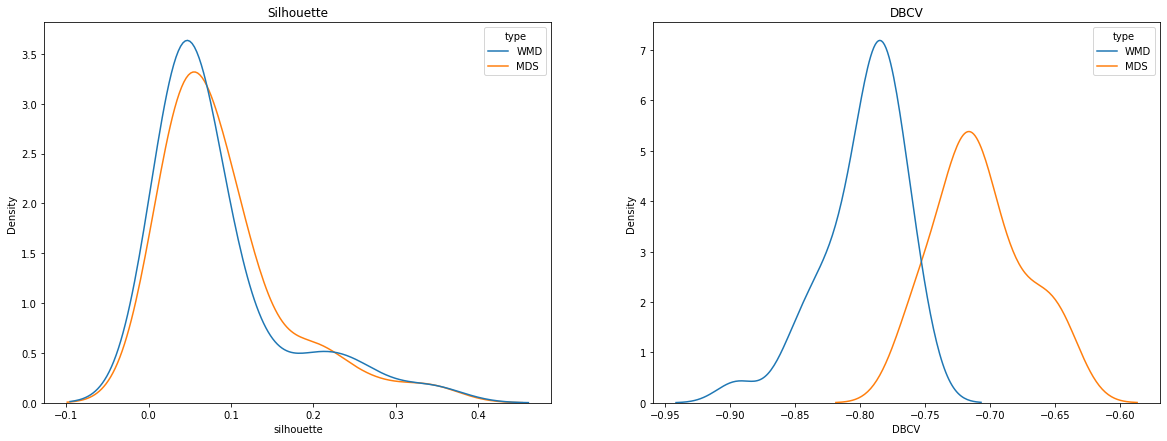

In [24]:
plt.figure(figsize = (20,7))
sns.kdeplot(data=pd.concat([df_kmedoides_skipgram_wmd,df_kmedoides_skipgram_mds_euclidean]).dropna(subset="silhouette").reset_index(),x="silhouette",hue="type",ax=plt.subplot(1,2,1,title="Silhouette"))
sns.kdeplot(data=pd.concat([df_kmedoides_skipgram_wmd,df_kmedoides_skipgram_mds_euclidean]).dropna(subset="DBCV").reset_index(),x="DBCV",hue="type",ax=plt.subplot(1,2,2,title="DBCV"))

### Comparaison HDBSCAN

In [14]:
df_hdbscan_skipgram_mds_euclidean,_ = CL.selection_meilleur_hdbscan(data=mat_skipgram_mds_eculidean,listeDistances="precomputed",listeMinClusterSize=range(2,50,5),listeVoisinage=range(2,50,5),init_dim=mat_skipgram_mds.shape[1])
df_hdbscan_skipgram_mds,_ = CL.selection_meilleur_hdbscan(data=mat_skipgram_mds,listeDistances="euclidean",listeMinClusterSize=range(2,50,5),listeVoisinage=range(2,50,5))
df_hdbscan_skipgram_wmd,_ = CL.selection_meilleur_hdbscan(data=mat_skipgram_wmd,listeDistances="precomputed",listeMinClusterSize=range(2,50,5),listeVoisinage=range(2,50,5),init_dim=mat_skipgram_mds.shape[1])

Recherche optimale - HDBScan
0% DBCV zero-size array to reduction operation minimum which has no identity
1% 6% DBCV zero-size array to reduction operation minimum which has no identity
11% 16% DBCV zero-size array to reduction operation minimum which has no identity
21% 26% DBCV zero-size array to reduction operation minimum which has no identity
31% 36% DBCV zero-size array to reduction operation minimum which has no identity
41% 46% DBCV zero-size array to reduction operation minimum which has no identity
51% 56% DBCV zero-size array to reduction operation minimum which has no identity
61% 66% DBCV zero-size array to reduction operation minimum which has no identity
71% 76% DBCV zero-size array to reduction operation minimum which has no identity
81% 86% DBCV zero-size array to reduction operation minimum which has no identity
91% 96% 
 
Recherche optimale - HDBScan
0% 1% 6% 11% 16% DBCV zero-size array to reduction operation minimum which has no identity
21% 26% 31% 36% DBCV zero-s

/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)


DBCV zero-size array to reduction operation minimum which has no identity
1% 

/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)
/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:374: RuntimeWarning: invalid value encountered in double_scalars
  (min_density_sep - density_sparseness[i]) /


6% 

/home/ensai/.local/lib/python3.8/site-packages/hdbscan/validity.py:34: RuntimeWarning: divide by zero encountered in power
  result **= (-1.0 / d)


DBCV zero-size array to reduction operation minimum which has no identity
11% 16% DBCV zero-size array to reduction operation minimum which has no identity
21% 26% DBCV zero-size array to reduction operation minimum which has no identity
31% 36% DBCV zero-size array to reduction operation minimum which has no identity
41% 46% DBCV zero-size array to reduction operation minimum which has no identity
51% 56% DBCV zero-size array to reduction operation minimum which has no identity
61% 66% DBCV zero-size array to reduction operation minimum which has no identity
71% 76% DBCV zero-size array to reduction operation minimum which has no identity
81% 86% DBCV zero-size array to reduction operation minimum which has no identity
91% 96% 
 


<AxesSubplot:ylabel='distance'>

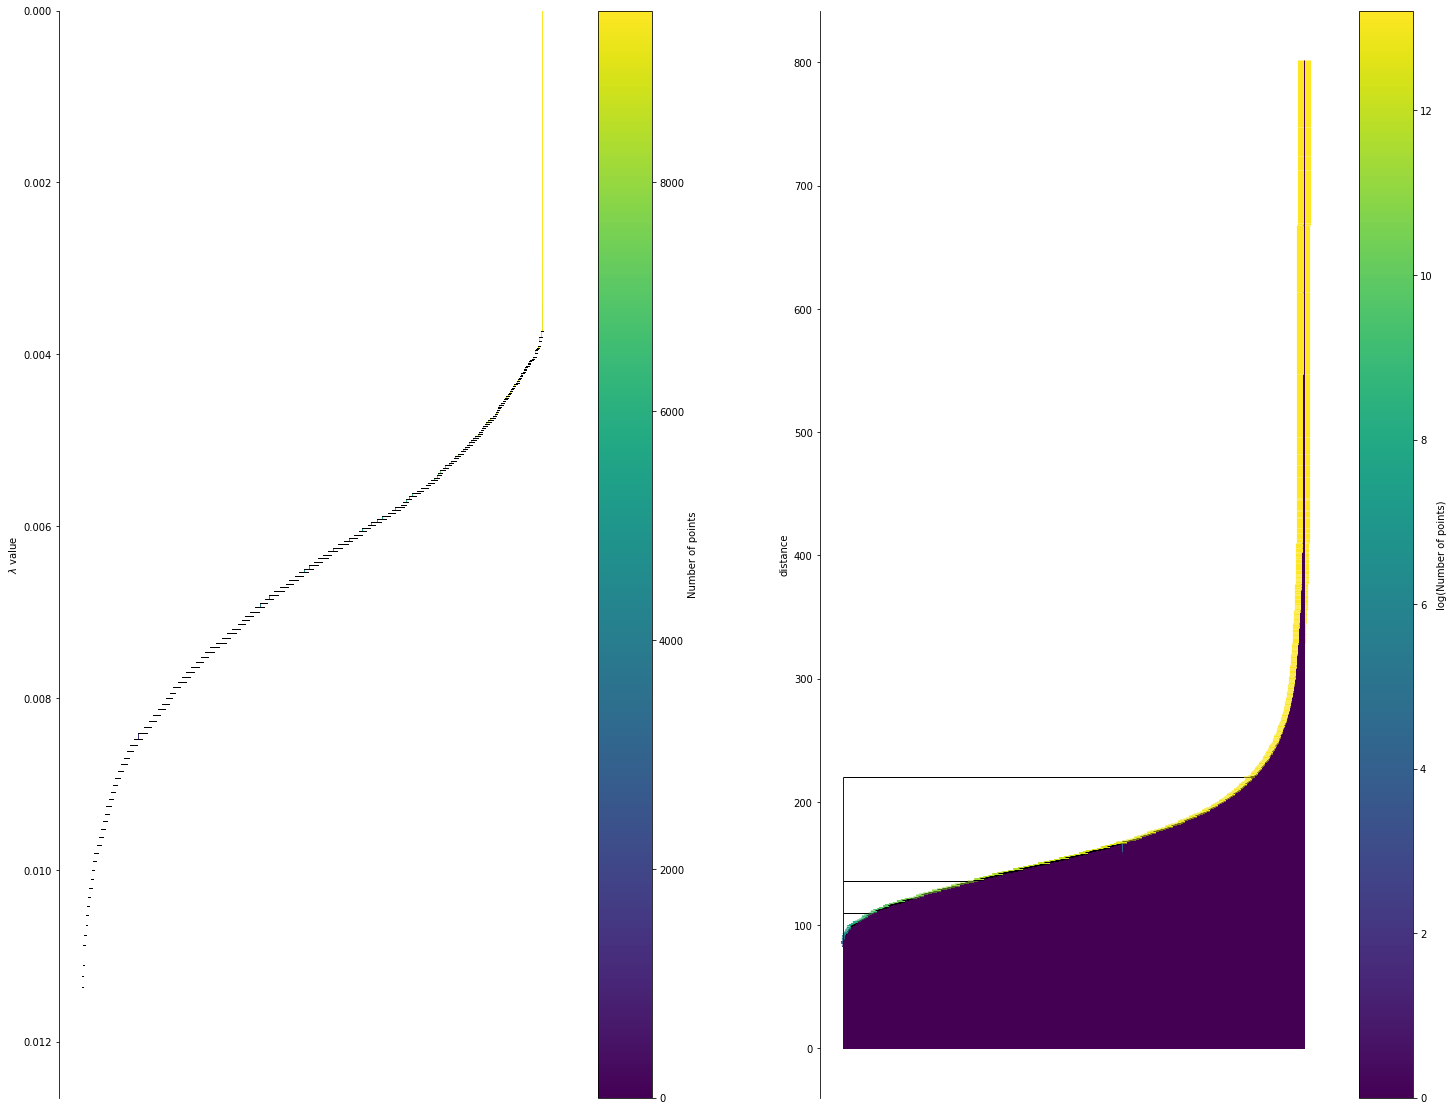

In [59]:
clusterer = HD.HDBSCAN(min_cluster_size=7, metric = "precomputed",min_samples=42)
cluster_labels = clusterer.fit_predict(np.array(mat_skipgram_wmd).astype(np.float64))
plt.figure(figsize=(25,20))
clusterer.condensed_tree_.plot(axis=plt.subplot(1,2,1))
clusterer.single_linkage_tree_.plot(axis=plt.subplot(1,2,2))

In [60]:
df_hdbscan_skipgram_wmd["type"] = "WMD"
df_hdbscan_skipgram_mds_euclidean["type"] = "MDS Euclidean"
df_hdbscan_skipgram_mds["type"] = "MDS"
df_hdbscan_skipgram_wmd

,voisinage,min_cluster_size,distance,K,silhouette,Cal-Harabasz,DBCV,non_classes,type
81,42,7,precomputed,3,0.227988,None,0.289982,331,WMD
21,12,7,precomputed,4,0.226880,None,0.288021,237,WMD
42,22,12,precomputed,3,0.188358,None,0.255417,490,WMD
12,7,12,precomputed,3,0.175191,None,0.254163,445,WMD
61,32,7,precomputed,3,0.277634,None,0.231217,247,WMD
...,...,...,...,...,...,...,...,...,...
50,27,2,precomputed,3,0.398508,None,None,43,WMD
60,32,2,precomputed,3,0.497973,None,None,32,WMD
70,37,2,precomputed,4,0.367993,None,None,62,WMD
80,42,2,precomputed,6,0.308078,None,None,87,WMD


<AxesSubplot:title={'center':'DBCV'}, xlabel='DBCV', ylabel='Density'>

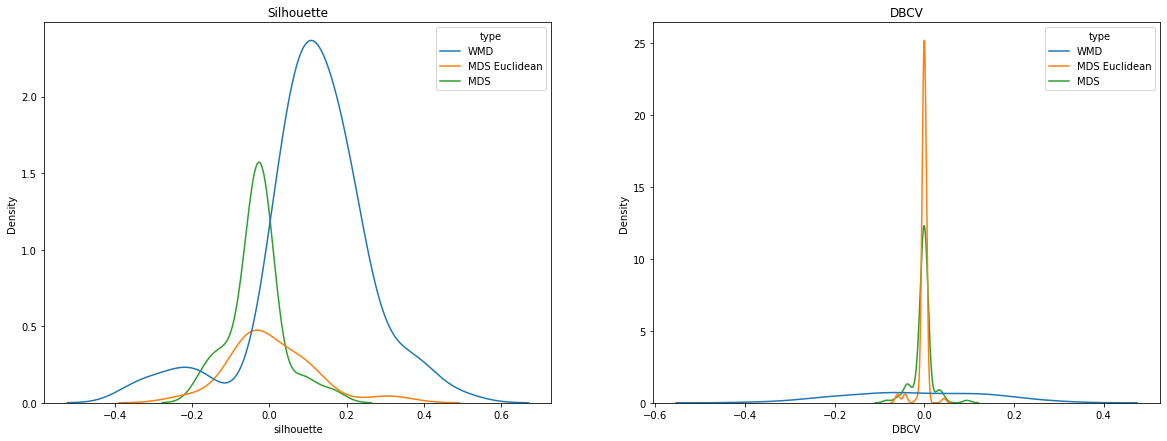

In [16]:
plt.figure(figsize = (20,7))
sns.kdeplot(data=pd.concat([df_hdbscan_skipgram_wmd,df_hdbscan_skipgram_mds_euclidean,df_hdbscan_skipgram_mds]).dropna(subset="silhouette").reset_index(),x="silhouette",hue="type",ax=plt.subplot(1,2,1,title="Silhouette"))
sns.kdeplot(data=pd.concat([df_hdbscan_skipgram_wmd,df_hdbscan_skipgram_mds_euclidean,df_hdbscan_skipgram_mds]).dropna(subset="DBCV").reset_index(),x="DBCV",hue="type",ax=plt.subplot(1,2,2,title="DBCV"))

In [65]:
tsne = TSNE(n_components = 2, perplexity=60, n_iter=2000, random_state=0)
tsne_results = tsne.fit_transform(mat_skipgram_mds)
df_hdbscan_skipgram_mds_euclidean,_ = CL.selection_meilleur_hdbscan(data=tsne_results,listeDistances="euclidean",listeMinClusterSize=range(2,6),listeVoisinage=range(1,6),init_dim=mat_skipgram_mds.shape[1])

/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Recherche optimale - HDBScan
0% DBCV zero-size array to reduction operation minimum which has no identity
5% 10% 15% 20% DBCV zero-size array to reduction operation minimum which has no identity
25% 30% 35% 40% DBCV zero-size array to reduction operation minimum which has no identity
45% 50% 55% 60% DBCV zero-size array to reduction operation minimum which has no identity
65% 70% 75% 80% 85% 90% 95% 
 


In [66]:
df_hdbscan_skipgram_mds_euclidean

,voisinage,min_cluster_size,distance,K,silhouette,Cal-Harabasz,DBCV,non_classes
1,1,3,euclidean,1634,0.190452,20.014435,0.312057,1731
5,2,3,euclidean,1264,0.062650,16.112155,0.294065,2628
9,3,3,euclidean,764,-0.105401,16.710073,0.243767,3800
10,3,4,euclidean,649,-0.114929,21.728145,0.218075,3767
6,2,4,euclidean,860,0.008869,22.877001,0.215716,2801
2,1,4,euclidean,1047,0.097326,26.136425,0.211587,2108
13,4,3,euclidean,529,-0.731075,19.869040,0.201148,4551
11,3,5,euclidean,513,-0.688062,26.770838,0.179245,3915
14,4,4,euclidean,440,-0.728862,24.504846,0.160434,4559
7,2,5,euclidean,614,-0.662776,33.300788,0.146221,2958


<AxesSubplot:title={'center':'DBCV'}, xlabel='DBCV', ylabel='Density'>

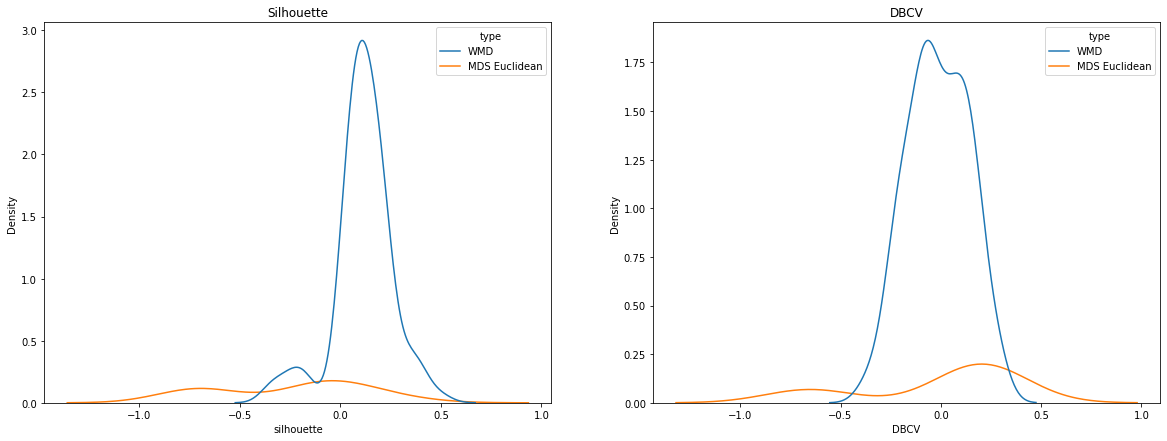

In [67]:
df_hdbscan_skipgram_mds_euclidean["type"] = "MDS Euclidean"
plt.figure(figsize = (20,7))
sns.kdeplot(data=pd.concat([df_hdbscan_skipgram_wmd,df_hdbscan_skipgram_mds_euclidean]).dropna(subset="silhouette").reset_index(),x="silhouette",hue="type",ax=plt.subplot(1,2,1,title="Silhouette"))
sns.kdeplot(data=pd.concat([df_hdbscan_skipgram_wmd,df_hdbscan_skipgram_mds_euclidean]).dropna(subset="DBCV").reset_index(),x="DBCV",hue="type",ax=plt.subplot(1,2,2,title="DBCV"))